In [5]:
from transformers import GPT2TokenizerFast, GPT2LMHeadModel
import torch
import math

# Load the Model

In [6]:
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
model.eval()

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

# Perplexity Helper

In [7]:
def compute_perplexity(text):
    encoded = tokenizer(text, return_tensors="pt", truncation=True, max_length=1024)
    input_ids = encoded["input_ids"]

    with torch.no_grad():
        outputs = model(input_ids=input_ids, labels=input_ids)
    
    loss = outputs.loss.item()
    return math.exp(loss)

# Dataset

In [8]:
topics = {
    "newton_laws": {
        "structured": """<html>
<head>
    <title>Newton's Laws of Motion</title>
</head>
<body>
    <article>
        <h1>Newton's Three Laws of Motion</h1>
        <section class="first-law">
            <h2>First Law (Law of Inertia)</h2>
            <p class="statement">An object at rest stays at rest, and an object in motion stays in motion with constant velocity unless acted upon by a net external force.</p>
            <p class="formula">ΣF = 0 implies constant velocity</p>
        </section>
        <section class="second-law">
            <h2>Second Law (Law of Acceleration)</h2>
            <p class="statement">The acceleration of an object is directly proportional to the net force acting on it and inversely proportional to its mass.</p>
            <p class="formula">F = ma</p>
        </section>
        <section class="third-law">
            <h2>Third Law (Action-Reaction)</h2>
            <p class="statement">For every action, there is an equal and opposite reaction.</p>
            <p class="formula">F12 = -F21</p>
        </section>
        <section class="published">
            <h2>Publication</h2>
            <p>Published in Philosophiæ Naturalis Principia Mathematica (1687)</p>
        </section>
    </article>
</body>
</html>""",
        "unstructured": "Isaac Newton formulated three fundamental laws that describe the relationship between forces and motion, publishing these principles in his groundbreaking work Philosophiæ Naturalis Principia Mathematica in 1687. The first law, known as the law of inertia, establishes that objects maintain their state of rest or uniform motion unless influenced by an external force. Newton's second law provides a quantitative relationship, demonstrating that acceleration depends directly on the applied force and inversely on the object's mass, expressed mathematically as force equals mass times acceleration. The third law introduces the concept of action and reaction, stating that forces always occur in pairs with equal magnitude but opposite direction.",
        "broad_q": "What are Newton's laws of motion and why are they important in physics?",
        "medium_q": "How does Newton's second law mathematically describe the relationship between force, mass, and acceleration?",
        "specific_q": "Can you provide an example that demonstrates Newton’s third law of motion in a real-world scenario?"
    },
    "photosynthesis": {
        "structured": """<html>
<head>
    <title>Photosynthesis: Light-Dependent Reactions</title>
</head>
<body>
    <article>
        <h1>Photosynthesis</h1>
        <section class="definition">
            <h2>Definition</h2>
            <p>Photosynthesis is the process by which plants convert light energy into chemical energy.</p>
        </section>
        <section class="location">
            <h2>Location</h2>
            <p>Chloroplasts in plant cells</p>
        </section>
        <section class="reactants">
            <h2>Reactants</h2>
            <ul>
                <li>Carbon dioxide (CO2)</li>
                <li>Water (H2O)</li>
                <li>Light energy</li>
            </ul>
        </section>
        <section class="products">
            <h2>Products</h2>
            <ul>
                <li>Glucose (C6H12O6)</li>
                <li>Oxygen (O2)</li>
            </ul>
        </section>
        <section class="equation">
            <h2>Chemical Equation</h2>
            <p>6CO2 + 6H2O + light energy → C6H12O6 + 6O2</p>
        </section>
    </article>
</body>
</html>""",
        "unstructured": "Photosynthesis represents a fundamental biological process through which plants transform light energy into chemical energy stored in glucose molecules. This complex biochemical pathway occurs within specialized organelles called chloroplasts, which are found in plant cells. The process requires three essential components: carbon dioxide, water, and light energy. Through a series of intricate reactions, these reactants are converted into glucose and oxygen. The overall chemical transformation can be summarized as six molecules of carbon dioxide combining with six molecules of water in the presence of light energy to produce one molecule of glucose and six molecules of oxygen.",
        "broad_q": "What is photosynthesis and why is it essential for life on Earth?",
        "medium_q": "How do chloroplasts contribute to the conversion of light energy into chemical energy?",
        "specific_q": "What is the balanced chemical equation that represents the transformation of reactants into glucose and oxygen during photosynthesis?"
    },
    "water_cycle": {
        "structured": """<html>
<head>
    <title>The Hydrological Cycle</title>
</head>
<body>
    <article>
        <h1>The Water Cycle</h1>
        <section class="overview">
            <h2>Overview</h2>
            <p>The water cycle describes the continuous movement of water on, above, and below Earth's surface.</p>
        </section>
        <section class="stages">
            <h2>Primary Stages</h2>
            <ol>
                <li>
                    <h3>Evaporation</h3>
                    <p>Water transforms from liquid to vapor due to solar heating</p>
                </li>
                <li>
                    <h3>Condensation</h3>
                    <p>Water vapor cools and forms clouds</p>
                </li>
                <li>
                    <h3>Precipitation</h3>
                    <p>Water falls to Earth as rain, snow, sleet, or hail</p>
                </li>
                <li>
                    <h3>Collection</h3>
                    <p>Water accumulates in oceans, lakes, rivers, and groundwater</p>
                </li>
            </ol>
        </section>
        <section class="energy-source">
            <h2>Energy Source</h2>
            <p>Solar radiation from the Sun</p>
        </section>
    </article>
</body>
</html>""",
        "unstructured": "The hydrological cycle, commonly referred to as the water cycle, encompasses the perpetual circulation of water throughout Earth's various environmental systems. This essential process begins with evaporation, during which solar radiation provides sufficient thermal energy to transform liquid water into water vapor. As this vapor ascends into the atmosphere, it undergoes condensation when temperatures decrease, resulting in the formation of clouds. Subsequently, precipitation occurs when water returns to the Earth's surface in various forms including rain, snow, sleet, and hail. The cycle concludes with collection, as water accumulates in diverse reservoirs such as oceans, lakes, rivers, and underground aquifers, where it remains until the process repeats.",
        "broad_q": "What is the water cycle and how does it help water continuously move through Earth’s systems?",
        "medium_q": "How do evaporation and condensation contribute to the movement of water into and within the atmosphere?",
        "specific_q": "How does precipitation return water to Earth and what roles do lakes, rivers, and aquifers play in water collection?"
    },
    "eukaryotic_cells": {
        "structured": """<html>
<head>
    <title>Eukaryotic Cell Structure</title>
</head>
<body>
    <article>
        <h1>Eukaryotic Cell Components</h1>
        <section class="definition">
            <h2>Definition</h2>
            <p>Eukaryotic cells are complex cells containing membrane-bound organelles and a nucleus.</p>
        </section>
        <section class="major-organelles">
            <h2>Major Organelles</h2>
            <table>
                <tr>
                    <th>Organelle</th>
                    <th>Function</th>
                </tr>
                <tr>
                    <td>Nucleus</td>
                    <td>Contains genetic material and controls cell activities</td>
                </tr>
                <tr>
                    <td>Mitochondria</td>
                    <td>Produces ATP through cellular respiration</td>
                </tr>
                <tr>
                    <td>Endoplasmic Reticulum</td>
                    <td>Synthesizes proteins and lipids</td>
                </tr>
                <tr>
                    <td>Golgi Apparatus</td>
                    <td>Modifies and packages proteins</td>
                </tr>
                <tr>
                    <td>Ribosomes</td>
                    <td>Synthesizes proteins</td>
                </tr>
            </table>
        </section>
        <section class="size">
            <h2>Typical Size</h2>
            <p>10-100 micrometers in diameter</p>
        </section>
    </article>
</body>
</html>""",
        "unstructured": "Eukaryotic cells represent sophisticated biological structures characterized by their membrane-bound organelles and distinct nucleus, typically measuring between ten and one hundred micrometers in diameter. The nucleus serves as the command center, housing genetic material and regulating cellular activities. Mitochondria function as the powerhouse of the cell, generating adenosine triphosphate through the process of cellular respiration. The endoplasmic reticulum plays a crucial role in synthesizing both proteins and lipids, while the Golgi apparatus subsequently modifies and packages these proteins for distribution. Ribosomes, found throughout the cell, are responsible for protein synthesis by translating genetic information into functional protein molecules.",
        "broad_q": "What are eukaryotic cells and how are they different from prokaryotic cells?",
        "medium_q": "How do membrane-bound organelles allow eukaryotic cells to perform specialized functions?",
        "specific_q": "What roles do the mitochondria, Golgi apparatus, and endoplasmic reticulum play in energy production and protein processing within a cell?"
    },
    "plate_tectonics": {
        "structured": """<html>
<head>
    <title>Theory of Plate Tectonics</title>
</head>
<body>
    <article>
        <h1>Plate Tectonics</h1>
        <section class="theory">
            <h2>Theory Overview</h2>
            <p>Plate tectonics is the scientific theory explaining the movement of Earth's lithosphere.</p>
        </section>
        <section class="structure">
            <h2>Earth's Structure</h2>
            <ul>
                <li>Lithosphere: Rigid outer layer (crust and upper mantle)</li>
                <li>Asthenosphere: Semi-fluid layer below lithosphere</li>
                <li>Number of major plates: 7-8 large tectonic plates</li>
            </ul>
        </section>
        <section class="plate-boundaries">
            <h2>Types of Plate Boundaries</h2>
            <dl>
                <dt>Divergent Boundaries</dt>
                <dd>Plates move apart, creating new crust</dd>
                <dt>Convergent Boundaries</dt>
                <dd>Plates collide, forming mountains or subduction zones</dd>
                <dt>Transform Boundaries</dt>
                <dd>Plates slide past each other horizontally</dd>
            </dl>
        </section>
        <section class="rate">
            <h2>Movement Rate</h2>
            <p>1-10 centimeters per year</p>
        </section>
    </article>
</body>
</html>""",
        "unstructured": "The theory of plate tectonics provides a comprehensive framework for understanding the dynamic movement of Earth's lithosphere, which consists of the rigid outer crust and uppermost portion of the mantle. This lithosphere is divided into seven to eight major plates that float upon the semi-fluid asthenosphere beneath. These massive plates move at rates ranging from one to ten centimeters annually. Plate interactions occur at three distinct types of boundaries: divergent boundaries where plates separate and new crustal material forms, convergent boundaries where plates collide resulting in mountain formation or subduction zones, and transform boundaries where plates slide laterally past one another along fault lines.",
        "broad_q": "What does the theory of plate tectonics explain about Earth’s surface and geological activity?",
        "medium_q": "How do interactions at divergent, convergent, and transform boundaries shape Earth’s crust?",
        "specific_q": "How can subduction at convergent boundaries lead to volcanic activity or mountain formation?"
    },
    "dna_structure": {
        "structured": """<html>
<head>
    <title>Deoxyribonucleic Acid Structure</title>
</head>
<body>
    <article>
        <h1>DNA: The Molecule of Heredity</h1>
        <section class="structure">
            <h2>Molecular Structure</h2>
            <p>DNA forms a double helix composed of two antiparallel polynucleotide strands.</p>
        </section>
        <section class="components">
            <h2>Chemical Components</h2>
            <ul>
                <li>Sugar: Deoxyribose</li>
                <li>Phosphate group</li>
                <li>Nitrogenous bases: Adenine, Thymine, Guanine, Cytosine</li>
            </ul>
        </section>
        <section class="base-pairing">
            <h2>Base Pairing Rules</h2>
            <table>
                <tr>
                    <td>Adenine (A)</td>
                    <td>pairs with</td>
                    <td>Thymine (T)</td>
                </tr>
                <tr>
                    <td>Guanine (G)</td>
                    <td>pairs with</td>
                    <td>Cytosine (C)</td>
                </tr>
            </table>
        </section>
        <section class="discovery">
            <h2>Discovery</h2>
            <p>Structure elucidated by James Watson and Francis Crick in 1953</p>
        </section>
        <section class="function">
            <h2>Primary Function</h2>
            <p>Stores and transmits genetic information</p>
        </section>
    </article>
</body>
</html>""",
        "unstructured": "Deoxyribonucleic acid, commonly known as DNA, serves as the fundamental molecule responsible for storing and transmitting genetic information across generations. This remarkable biomolecule adopts a double helix configuration, consisting of two antiparallel polynucleotide strands that wind around each other. Each strand comprises three essential chemical components: a deoxyribose sugar molecule, a phosphate group, and one of four nitrogenous bases. The nitrogenous bases follow specific pairing rules, with adenine consistently bonding to thymine and guanine pairing with cytosine. This elegant structure was first described by James Watson and Francis Crick in 1953, revolutionizing our understanding of molecular biology and heredity.",
        "broad_q": "What is DNA and why is it important for genetic inheritance?",
        "medium_q": "How does the double-helix structure of DNA support its role in storing genetic information?",
        "specific_q": "What are the base-pairing rules in DNA and how do they ensure accurate replication?"
    },
    "electromagnetic_spectrum": {
        "structured": """<html>
<head>
    <title>The Electromagnetic Spectrum</title>
</head>
<body>
    <article>
        <h1>Electromagnetic Spectrum</h1>
        <section class="definition">
            <h2>Definition</h2>
            <p>The electromagnetic spectrum encompasses all types of electromagnetic radiation organized by frequency and wavelength.</p>
        </section>
        <section class="speed">
            <h2>Speed of Propagation</h2>
            <p>All electromagnetic waves travel at the speed of light: 299,792,458 meters per second in vacuum</p>
        </section>
        <section class="regions">
            <h2>Spectral Regions (ordered by increasing frequency)</h2>
            <ol>
                <li>
                    <h3>Radio Waves</h3>
                    <p>Wavelength: >1 millimeter</p>
                </li>
                <li>
                    <h3>Microwaves</h3>
                    <p>Wavelength: 1 millimeter to 1 meter</p>
                </li>
                <li>
                    <h3>Infrared</h3>
                    <p>Wavelength: 700 nanometers to 1 millimeter</p>
                </li>
                <li>
                    <h3>Visible Light</h3>
                    <p>Wavelength: 380 to 700 nanometers</p>
                </li>
                <li>
                    <h3>Ultraviolet</h3>
                    <p>Wavelength: 10 to 380 nanometers</p>
                </li>
                <li>
                    <h3>X-rays</h3>
                    <p>Wavelength: 0.01 to 10 nanometers</p>
                </li>
                <li>
                    <h3>Gamma Rays</h3>
                    <p>Wavelength: <0.01 nanometers</p>
                </li>
            </ol>
        </section>
    </article>
</body>
</html>

""",
        "unstructured": "The electromagnetic spectrum represents the complete range of electromagnetic radiation, organized systematically according to wavelength and frequency characteristics. All forms of electromagnetic radiation propagate through vacuum at a constant velocity of approximately 299,792,458 meters per second, commonly known as the speed of light. The spectrum begins with radio waves, which possess wavelengths exceeding one millimeter, followed by microwaves ranging from one millimeter to one meter. Infrared radiation occupies wavelengths between 700 nanometers and one millimeter, while visible light, the only portion detectable by human eyes, spans 380 to 700 nanometers. Higher energy regions include ultraviolet radiation from 10 to 380 nanometers, X-rays between 0.01 and 10 nanometers, and gamma rays with wavelengths shorter than 0.01 nanometers.",
        "broad_q": "What is the electromagnetic spectrum and what types of radiation does it include?",
        "medium_q": "How do wavelength and frequency determine the different regions of the electromagnetic spectrum?",
        "specific_q": "How do visible light wavelengths compare with ultraviolet and infrared radiation in terms of energy?"
    }
}


# Structured Vs Unstructured

In [9]:
print("\n Structured vs Unstructured \n")

results_struct = []
results_unstruct = []

for name, data in topics.items():
    ppl_struct = compute_perplexity(data["structured"])
    ppl_unstruct = compute_perplexity(data["unstructured"])
    
    results_struct.append(ppl_struct)
    results_unstruct.append(ppl_unstruct)

    print(f"{name:20} Structured PPL: {ppl_struct:.2f} | Unstructured PPL: {ppl_unstruct:.2f}")

avg_struct = sum(results_struct) / len(results_struct)
avg_unstruct = sum(results_unstruct) / len(results_unstruct)

print("\nAverage Structured PPL   :", round(avg_struct, 2))
print("Average Unstructured PPL :", round(avg_unstruct, 2))


 Structured vs Unstructured 



`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


newton_laws          Structured PPL: 4.22 | Unstructured PPL: 26.37
photosynthesis       Structured PPL: 3.06 | Unstructured PPL: 18.00
water_cycle          Structured PPL: 2.83 | Unstructured PPL: 15.53
eukaryotic_cells     Structured PPL: 2.50 | Unstructured PPL: 22.30
plate_tectonics      Structured PPL: 3.67 | Unstructured PPL: 32.01
dna_structure        Structured PPL: 3.18 | Unstructured PPL: 23.08
electromagnetic_spectrum Structured PPL: 2.33 | Unstructured PPL: 17.70

Average Structured PPL   : 3.11
Average Unstructured PPL : 22.14


# Visualization

In [10]:
import matplotlib.pyplot as plt
import numpy as np

### Extracting topics and perplexity values 

In [11]:
topics_list = list(topics.keys())
structured_ppls = [compute_perplexity(topics[t]["structured"]) for t in topics_list]
unstructured_ppls = [compute_perplexity(topics[t]["unstructured"]) for t in topics_list]

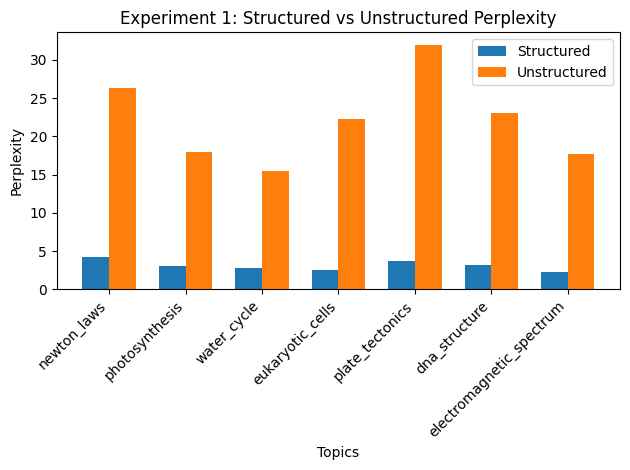

In [15]:
x = np.arange(len(topics_list))
width = 0.35 

plt.figure()
plt.bar(x - width/2, structured_ppls, width, label='Structured')
plt.bar(x + width/2, unstructured_ppls, width, label='Unstructured')

plt.xlabel("Topics")
plt.ylabel("Perplexity")
plt.title("Experiment 1: Structured vs Unstructured Perplexity")
plt.xticks(x, topics_list, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

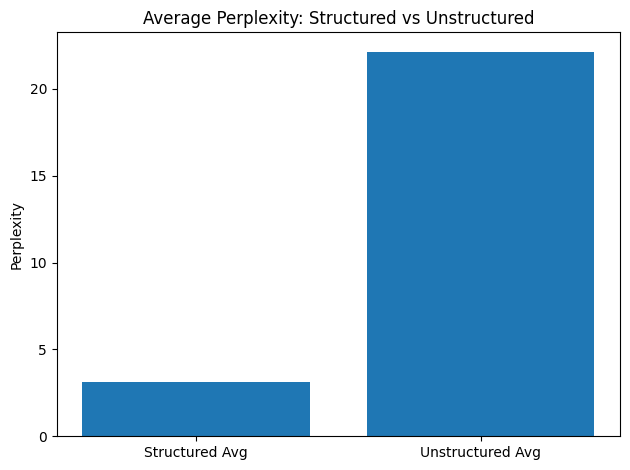

In [16]:
avg_struct = sum(results_struct) / len(results_struct)
avg_unstruct = sum(results_unstruct) / len(results_unstruct)

plt.figure()
plt.bar(["Structured Avg", "Unstructured Avg"], [avg_struct, avg_unstruct])
plt.ylabel("Perplexity")
plt.title("Average Perplexity: Structured vs Unstructured")
plt.tight_layout()
plt.show()